<h2> Nauczanie maszynowe/Ćwiczenia6

<h2>
    Podstawy przetwarzania obrazów za pomocą konwolucyjnych sieci neuronowych

Adrian Kania

<h4> Filtry Sobela

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
vertical = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
horizontal = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

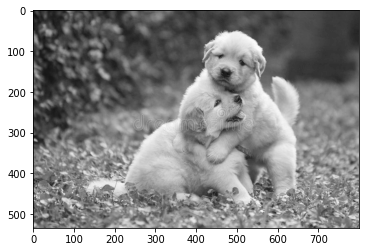

In [ ]:
fname = 'dogs.jpeg'
image = Image.open(fname).convert("L")
arr = np.asarray(image)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

<h4> Zadanie1: Zaimplementuj filtry Sobela a następnie przetestuj na przykładowej fotografii 1D (odcienie szarości).

In [ ]:
height = len(arr)
width = len(arr[0])
print(height,width)

534 800


In [ ]:
output = np.zeros([height-2, width-2])

In [ ]:
print(arr[0:3, 0:3])

[[35 41 50]
 [30 34 41]
 [31 31 35]]


In [ ]:
for row in range(len(output)):
  for column in range(len(output[0])):
    vert = np.sum(np.dot(arr[row:row+3,column:column+ 3] , vertical))
    hori = np.sum(np.dot(arr[row:row+3,column:column+ 3] , horizontal))
    output[row][column] = np.sqrt(vert ** 2 + hori **2)

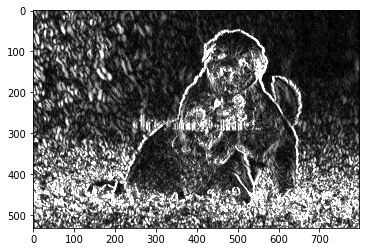

In [ ]:
plt.imshow(output, cmap='gray', vmin=0, vmax=255)
plt.show()

nawet nie zauważyłem znaku wodnego przed filtrami

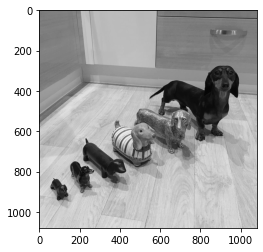

In [ ]:
fname = 'dachshund.jpeg'
image = Image.open(fname).convert("L")
arr = np.asarray(image)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

1080 1080


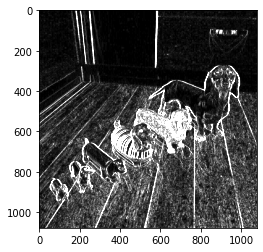

In [ ]:
height = len(arr)
width = len(arr[0])
print(height,width)
output = np.zeros([height-2, width-2])
for row in range(len(output)):
  for column in range(len(output[0])):
    vert = np.sum(np.dot(arr[row:row+3,column:column+ 3] , vertical))
    hori = np.sum(np.dot(arr[row:row+3,column:column+ 3] , horizontal))
    output[row][column] = np.sqrt(vert ** 2 + hori **2)
plt.imshow(output, cmap='gray', vmin=0, vmax=255)
plt.show()

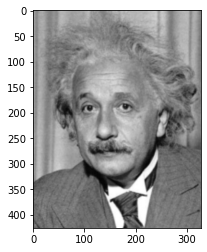

In [ ]:
fname = 'einstein.png'
image = Image.open(fname).convert("L")
arr = np.asarray(image)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

426 328


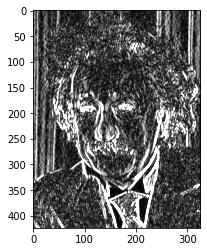

In [ ]:
height = len(arr)
width = len(arr[0])
print(height,width)
output = np.zeros([height-2, width-2])
for row in range(len(output)):
  for column in range(len(output[0])):
    vert = np.sum(np.dot(arr[row:row+3,column:column+ 3] , vertical))
    hori = np.sum(np.dot(arr[row:row+3,column:column+ 3] , horizontal))
    output[row][column] = np.sqrt(vert ** 2 + hori **2)
plt.imshow(output, cmap='gray', vmin=0, vmax=255)
plt.show()

tylko jeden filtr dla Einsteina:

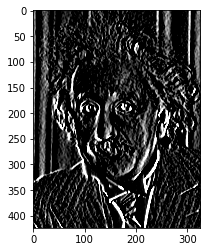

In [ ]:
for row in range(len(output)):
  for column in range(len(output[0])):
    output[row][column] = np.sum(np.dot(arr[row:row+3,column:column+ 3] , horizontal))
plt.imshow(output, cmap='gray', vmin=0, vmax=255)
plt.show()

<h4> Zadanie2: Uzasadnij, że liczba parametrów warstwy konwolucyjnej wyraża się następującym wzorem:
<br><br>
    <center> $P=nk_Wk_Hk_c+n$ </center>
<br> <br>
gdzie:
    
* $n$ - liczba kanałów wyjściowych
- $k_W$ - szerokość filtru
- $k_H$ - wysokość filtru
- $k_c$ - liczba kanałów wejściowych
    

Weżmy filtr o wymiarach kw * kh. Ponadto, mamy kc kanałów wejściowych i n kanałów wyjściowych. Nasz filtr będzie miał wymiar kw * kh * kc, bo musi obsługiwać każdy z kanałów wejściowych. Skoro mamy n kanałów wyjściowych to architektura ta musi być powtórzona n razy, tym samym mamy: n * kw * kh * kc. Jeśli do tego dodamy jeszcze bias, tzn kw * kh * kc -> (kw * kh * kc + 1), to liczba parametrów warstwy konwolucyjnej będzie wynosić: (kw * kh * kc + 1) * n, czyli
kw * kh * kc * n + n.

<h4> Zadanie3: Uzasadnij, że rozmiar wynikowej mapy cech wyraża się poprzez:
<br><br>
<center>
    $[\frac{H-k_H+2p}{s}]+1 \times [\frac{W-k_W+2p}{s}]+1$ </center>
    
<br> <br>
gdzie:
    
- $k_W$ - szerokość filtru
- $k_H$ - wysokość filtru
- $W$ - szerokość wejściowej mapy cech
- $H$ - wysokość wejściowej mapy cech
- $s$ - krok
- $p$ - rozmiar rozszerzenia obrazu (w pikselach), paddig
        

Wejściowa mapa cech jest wymiaru:

<center>
   $ H \times W $
</center>

Jeśli nałożymy filtr to pośrednio będzie to oznaczało, że mamy do czynienia z wymiarem:

<center>

   $ H - kw + 1 \times W - kh + 1 $

</center>





Uwzględniamy padding - dodajemy obramowanie -> dodatkowe dwa rzędy i dwie kolumny:

<center>

   $ H - kw + 2p + 1 \times W - kh + 2p + 1 $

</center>


Oraz stride - przeskok = stride, pomiędzy mnożeniem macierzy "dzieli" nam wynikowy wymiar:


<center>

   $ [\frac{H - kw + 2p}{s} + 1] \times [\frac{W - kh + 2p}{s} + 1] $

</center>

    


<h4> Zadanie4: Napisać funkcje do interpolacji zdjęć na dowolnie zadany wymiar. Przykładowo, mamy zdjecie 4x5, chcemy 10x12. Uwaga: W przypadku wielokrotności rozmiaru jest to stosunkowo proste zadanie.

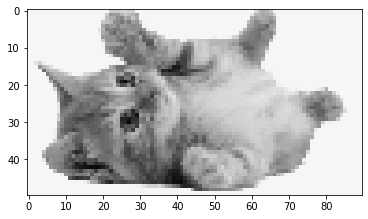

In [348]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

fname = 'cat-90x50.jpg'
image = Image.open(fname).convert("L")
arr = np.asarray(image)
plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.show()

In [349]:
import math

def interpolate(image, new_row, new_col):
    height = len(image)
    width = len(image[0])

    b_l = float(image[max(min(math.floor(new_row), height - 1), 0), max(min(math.floor(new_col), width - 1), 0)])
    a_l = float(image[max(min(math.ceil(new_row), height - 1), 0), max(min(math.floor(new_col), width - 1), 0)])
    b_r = float(image[max(min(math.floor(new_row), height - 1), 0), max(min(math.ceil(new_col), width - 1), 0)])
    a_r = float(image[max(min(math.ceil(new_row), height - 1), 0), max(min(math.ceil(new_col), width - 1), 0)])

    # average of four reference pixels
    new_pixel = round((a_l + a_r + b_l + b_r) / 4)

    return new_pixel




In [350]:
def resize(image, width, height):

    #initialize new image
    old_height = len(image)
    old_width = len(image[0])
    new_image = np.zeros((width, height))  

    # width:
    col_old_center = (old_width-1) / 2
    col_new_center = (width-1) / 2
    col_scale = old_width / width;

    #height    
    row_old_center = (old_height-1) / 2
    row_new_center = (height-1) / 2
    row_scale = old_height / height;

    #cover evey pixel of new image
    for row in range(height):
        for col in range(width):
            new_col = col_old_center + (col - col_new_center) * col_scale
            new_row = row_old_center + (row - row_new_center) * row_scale 
            new_image[col, row] = interpolate(image, new_row, new_col)

    return new_image

In [351]:
new_arr = resize(arr, 1800, 1000).T

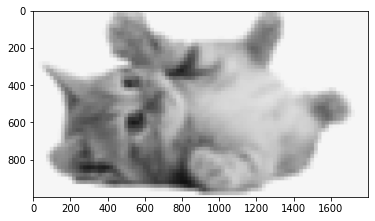

In [352]:
plt.imshow(new_arr, cmap='gray', vmin=0, vmax=255)
plt.show()
  

In [353]:
new_arr = resize(arr, 30, 20).T

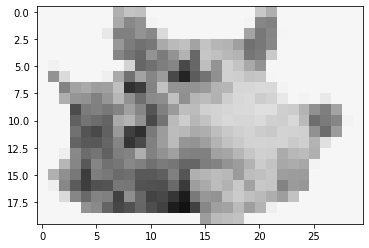

In [354]:
plt.imshow(new_arr, cmap='gray', vmin=0, vmax=255)
plt.show()
  

In [355]:
new_arr = resize(arr, 167, 214).T

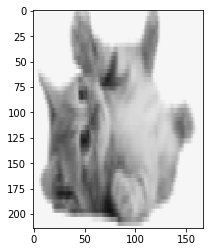

In [356]:
plt.imshow(new_arr, cmap='gray', vmin=0, vmax=255)
plt.show()
  